## Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Import The Data 

In [4]:
df = pd.read_csv('/Users/ramazansamilacak/Desktop/Data Analist Çalışmalarım/failed bank/banklist.csv', encoding='ISO-8859-1')

## Basic Data Informations  

In [5]:
df.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
2,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
3,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
4,Silicon Valley Bank,Santa Clara,CA,24735,FirstCitizens Bank & Trust Company,10-Mar-23,10539


In [6]:
df.shape

(568, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               568 non-null    object
 1   City                    568 non-null    object
 2   State                   568 non-null    object
 3   Cert                    568 non-null    int64 
 4   Acquiring Institution   568 non-null    object
 5   Closing Date            568 non-null    object
 6   Fund                    568 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.2+ KB


### Clean up the column names 
Clean up the column names by stripping extra spaces and special characters


In [13]:
df.columns

Index(['Bank Name ', 'City ', 'State ', 'Cert ', 'Acquiring Institution ',
       'Closing Date ', 'Fund'],
      dtype='object')

In [6]:
# Clean up the column names by stripping extra spaces and special characters
df.columns = [col.strip().replace(' ', '') for col in df.columns]

# Display the cleaned column names
df.columns

Index(['Bank Name', 'City', 'State', 'Cert', 'Acquiring Institution',
       'Closing Date', 'Fund'],
      dtype='object')

## Duplicate Values

In [7]:
df.duplicated().any()

False

## Missing Value 

In [16]:
df.isna().sum()

Bank Name                0
City                     0
State                    0
Cert                     0
Acquiring Institution    0
Closing Date             0
Fund                     0
dtype: int64

## Closing Date 

Change the type of the data as "date time"

In [8]:
df['Closing Date']

0       3-Nov-23
1      28-Jul-23
2       1-May-23
3      12-Mar-23
4      10-Mar-23
         ...    
563    27-Jul-01
564     3-May-01
565     2-Feb-01
566    14-Dec-00
567    13-Oct-00
Name: Closing Date, Length: 568, dtype: object

In [9]:
df2 = df.copy()

In [10]:
df2['Closing Date'] = pd.to_datetime(df2['Closing Date'], format='%d-%b-%y')

## 

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              568 non-null    object        
 1   City                   568 non-null    object        
 2   State                  568 non-null    object        
 3   Cert                   568 non-null    int64         
 4   Acquiring Institution  568 non-null    object        
 5   Closing Date           568 non-null    datetime64[ns]
 6   Fund                   568 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 31.2+ KB


In [19]:
df2.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,2023-11-03,10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",2023-07-28,10544
2,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",2023-05-01,10543
3,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,10540
4,Silicon Valley Bank,Santa Clara,CA,24735,FirstCitizens Bank & Trust Company,2023-03-10,10539


## Basic Analyze

### Fund Column

In [12]:
df2['Fund'].describe()

count      568.000000
mean     10041.323944
std       1111.414337
min       4645.000000
25%      10117.750000
50%      10259.500000
75%      10401.250000
max      10545.000000
Name: Fund, dtype: float64

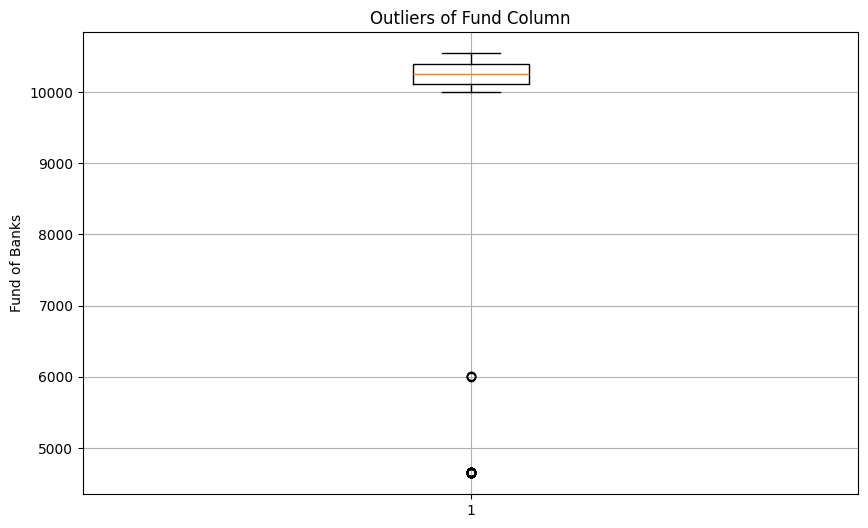

In [14]:
plt.figure(figsize=(10,6))
plt.title("Outliers of Fund Column")
plt.ylabel("Fund of Banks")
plt.boxplot(df2['Fund'])
plt.grid(True)
plt.show()


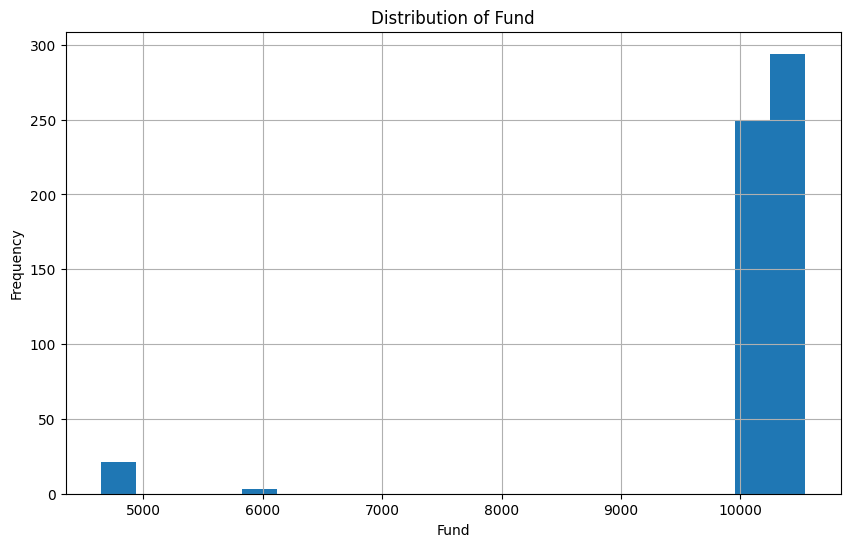

In [28]:
# Histogram of Fund column
plt.figure(figsize=(10, 6))
df2['Fund'].hist(bins=20)
plt.title('Distribution of Fund')
plt.xlabel('Fund')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


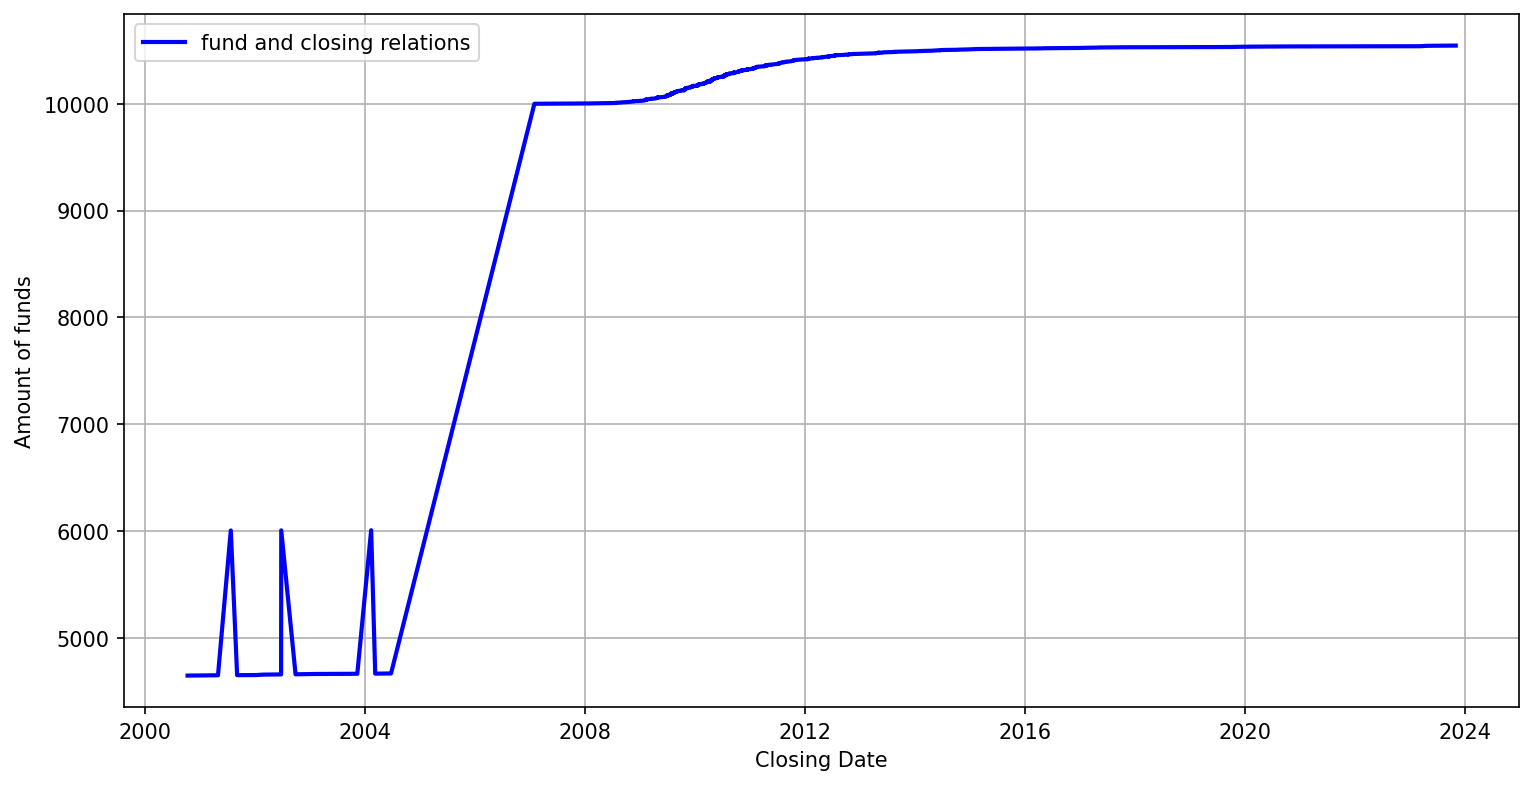

In [27]:
# fund - closing date 

plt.figure(figsize=(12,6), dpi = 150)
plt.ylabel('Amount of funds')
plt.xlabel('Closing Date')
plt.plot( df2['Closing Date'],df2['Fund'], color='blue', label = 'fund and closing relations', linestyle= '-', linewidth = '2')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Closing Date - Fund Relations 

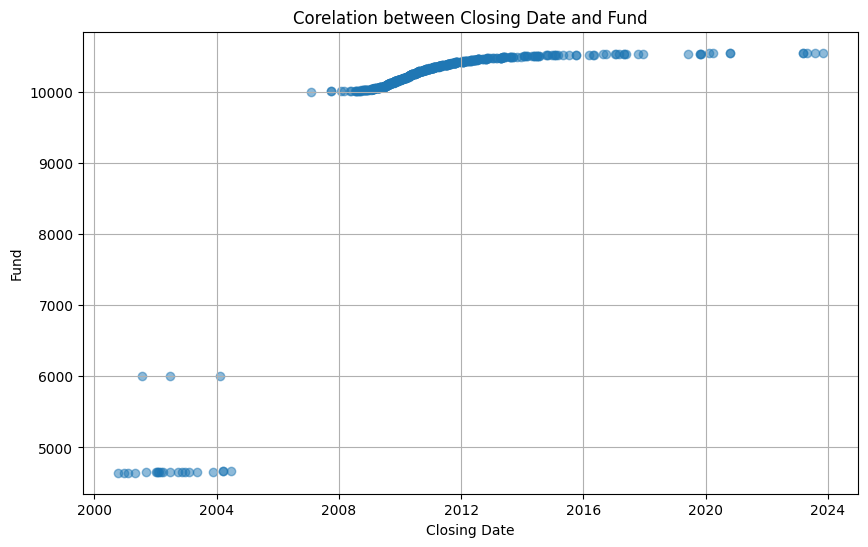

In [23]:
# Create Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(df2['Closing Date'], df2['Fund'], alpha=0.5)
plt.title('Corelation between Closing Date and Fund')
plt.xlabel('Closing Date')
plt.ylabel('Fund')
plt.grid(True)
plt.show()

#### Time Series Analysis 

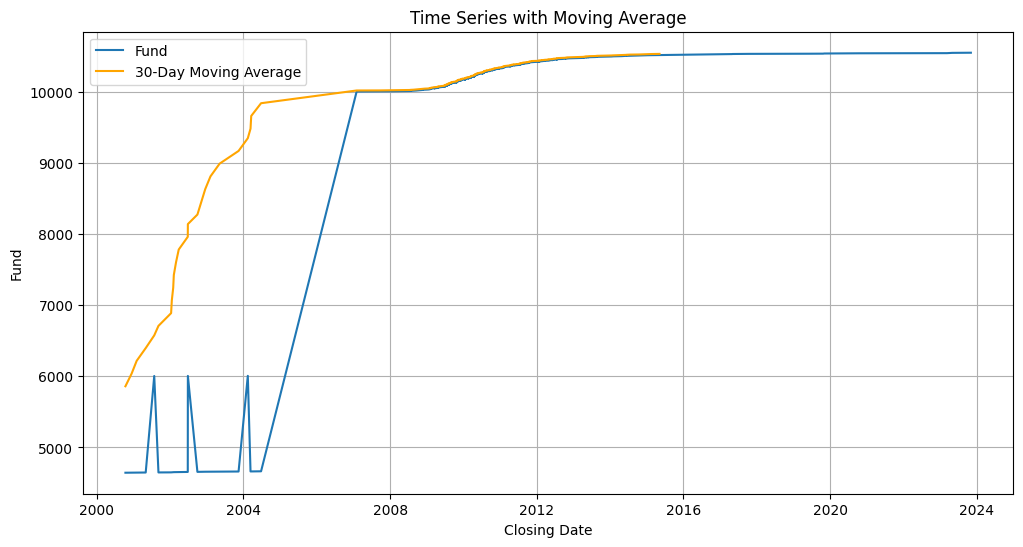

In [25]:
# 30 day moving average
df2['Fund_MA30'] = df2['Fund'].rolling(window=30).mean()

# Time series and moving average chart
plt.figure(figsize=(12, 6))
plt.plot(df2['Fund'], label='Fund')
plt.plot(df2['Fund_MA30'], label='30-Day Moving Average', color='orange')
plt.title('Time Series with Moving Average')
plt.xlabel('Closing Date')
plt.ylabel('Fund')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
df2['Acquiring Institution']

Closing Date
2023-11-03              Iowa Trust & Savings Bank
2023-07-28                 Dream First Bank, N.A.
2023-05-01              JPMorgan Chase Bank, N.A.
2023-03-12                    Flagstar Bank, N.A.
2023-03-10    FirstCitizens Bank & Trust Company
                             ...                 
2001-07-27                  Superior Federal, FSB
2001-05-03                      North Valley Bank
2001-02-02    Southern New Hampshire Bank & Trust
2000-12-14                Banterra Bank of Marion
2000-10-13                     Bank of the Orient
Name: Acquiring Institution, Length: 568, dtype: object

In [62]:
# Find the maximum and minimum values ​​by grouping the 'Bank Name' and 'Fund' columns
max_fund = df2.groupby('Acquiring Institution')['Fund'].max()
min_fund = df2.groupby('Acquiring Institution')['Fund'].min()

# Find banks with maximum and minimum 'Fund' values
max_bank = max_fund.idxmax()
min_bank = min_fund.idxmin()

# Find maximum and minimum 'Fund' values
max_fund_value = max_fund.max()
min_fund_value = min_fund.min()

print(f"Bank with Maximum Fund: {max_bank}, Fund Value: {max_fund_value}")
print(f"Bank with Minimum Fund: {min_bank}, Fund Value: {min_fund_value}")


Bank with Maximum Fund: Iowa Trust & Savings Bank, Fund Value: 10545
Bank with Minimum Fund: Bank of the Orient, Fund Value: 4645


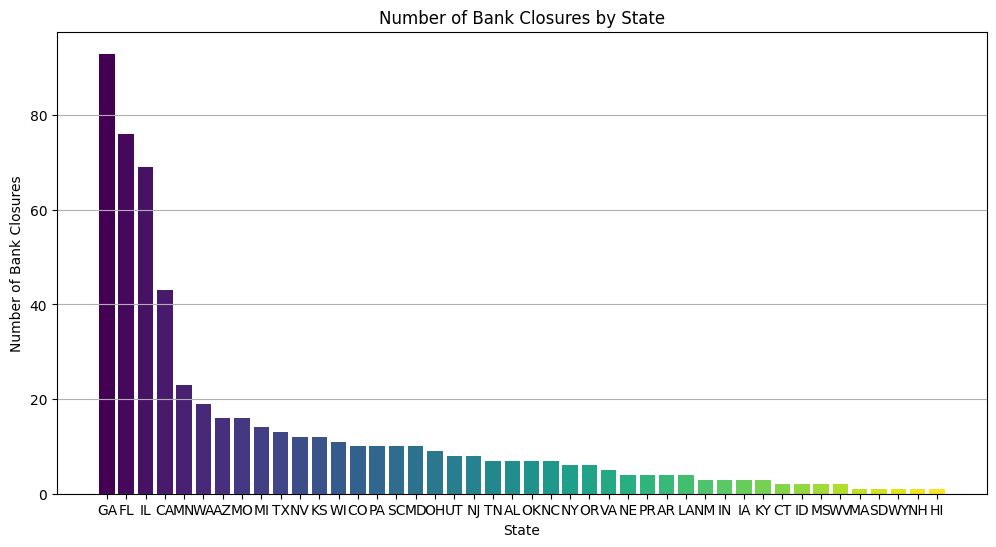

In [31]:
state_closing_counts = df2['State'].value_counts()

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(state_closing_counts)))

plt.figure(figsize=(12, 6))
plt.bar(state_closing_counts.index, state_closing_counts.values, color=colors)
plt.xlabel('State')
plt.ylabel('Number of Bank Closures')
plt.title('Number of Bank Closures by State')
plt.grid(axis='y')

plt.show()

### Top 20 Acquiring Institution 

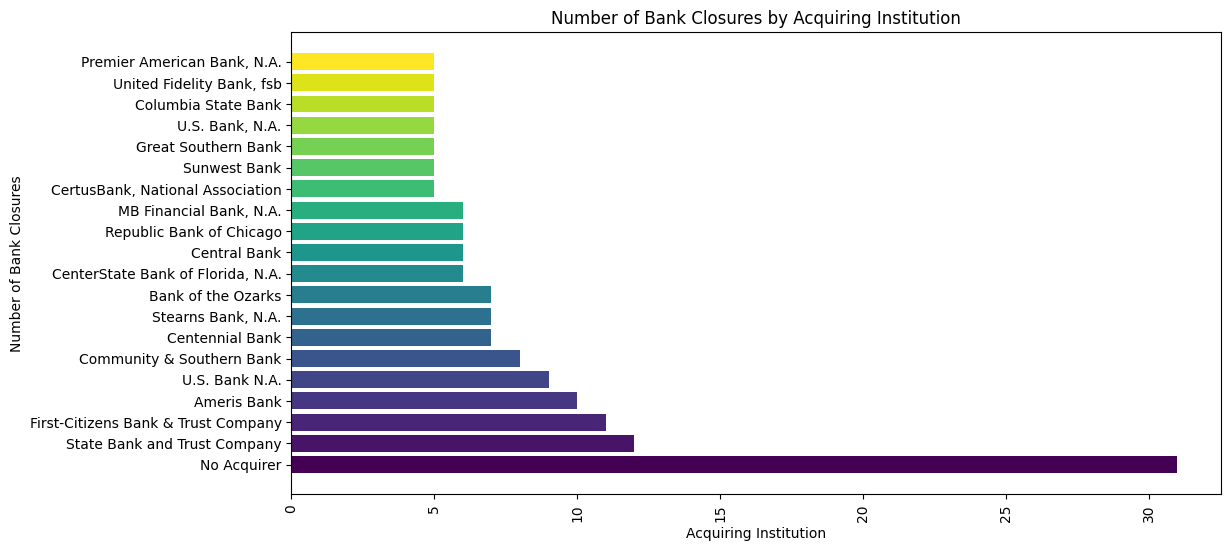

In [35]:
acquiring_institution = df2['Acquiring Institution'].value_counts().head(20)

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(acquiring_institution)))

plt.figure(figsize=(12, 6))
plt.barh(acquiring_institution.index, acquiring_institution.values, color=colors)

plt.xlabel('Acquiring Institution')
plt.ylabel('Number of Bank Closures')
plt.title('Number of Bank Closures by Acquiring Institution')

plt.xticks(rotation=90)

plt.show()
